### Question (1): (10pt)

Suppose that the independent variable $x$ has n observations: $(x_1,x_2,...x_n)$ and the dependent variable $y$ has corresponding observations: $(y_1, y_2,...,y_n)$. If the correlation between these two sequences $corr(x,y)=0.01$, which of the following statements are true? Please select all the right answers.

(a) There should be no strong relation between $x$ and $y$.

(b) There could be some strong linear relationship between $x$ and $y$.

(c) If we build a linear regression between $y$ and $x$ as $y=wx$, we could conclude that the OLS estimation for $w$ should be around 0.01.

(d) Certain relation between $x$ and $y$ could still exist, but it should be non-linear.

######Question 1 Correct Responses are choices C and D


### Question (2): (10pt)



Consider a model

$y=x^{b}$ where $b>0$. 

Now, suppose x doubles (originally $x>0$). How would y change with respect to this change of x? Let us denote new $y$ as $y'$. Please select all the right answers from below. 

(a) $y'>2y$ if b is bigger than one.

(b) $y'<2y$ if b is less than one.

(c) $y'=2y$ in any case.

(d) $y'$ increases by $(2^b-1)*100\%$.

######Question 2 Correct Responses are choices A, B and D



In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
%matplotlib inline

### Question (3): (30 pt)


In [3]:
x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [4]:
y=[28.0, 24.0, 37.0, -7.0, 28.0, 71.0, 89.0, 60.0, 100.0, 108.0, 116.0, 
   110.0, 114.0, 123.0, 124.0, 165.0, 169.0, 211.0, 211.0, 208.0]

#### (a) Calculate corr(x,y) without using a build-in function for the correlation coefficient.

In [16]:
#create a dataframe of x, y and then add in x^2, y^2 and x*y

df=pd.DataFrame([x,y]).T
df.columns=["x","y"]
df.loc[:, "x2"] = df.x**2
df.loc[:, "y2"] = df.y**2
df.loc[:, "xy"] = df.x*df.y
df.head()

,x,y,x2,y2,xy
0,0,28,0,784,0
1,1,24,1,576,24
2,2,37,4,1369,74
3,3,-7,9,49,-21
4,4,28,16,784,112


In [17]:
#Find the length of x (or y) to get n
n = len(x)

In [21]:
SumX = sum(x) 
SumY = sum(y)
sumX2 = sum(df.x2)
sumY2 = sum(df.y2)
sumXY = sum(df.xy)

In [23]:
Sxx = sumX2 - (SumX**2/n)
Syy = sumY2 - (SumY**2/n)
Sxy = sumXY - (SumX*SumY/n)

In [25]:
corrxy = Sxy/((Sxx*Syy)**.5)
print corrxy

0.957143492915


#### (b) Estimate linear model $y=w_1*x+w_0$ using OLS formulas and without using build-in functions for the linear regression. What is  $w_1$ and $w_0$? What is $R^2$?

In [28]:
w1=(sumXY-SumY*SumX/n)/(sumX2-SumX*SumX/n)
print("w1 is : {}".format(w1))

w1 is : 10.5466165414


In [29]:
w0=(df.y-df.x*w1).mean()
print("w0 is : {}".format(w0))

w0 is : 4.25714285714


#### (c) Use regression function to double check your answer making sure that your calculation is correct. 

In [35]:
lm = smf.ols(formula='y ~ x', data = df).fit()

In [36]:
print lm.params

Intercept     4.257143
x            10.546617
dtype: float64


In [123]:
df[['x', 'y']].corr()

,x,y
x,1.000000,0.957143
y,0.957143,1.000000


In [37]:
#These match our derived parameters.

### Question (4): (30pt) 

For the data below estimate a model: AssessTot = w* LotArea (with and without intercept)

LotArea: Total area of the tax lot

AssessTot: The actual assessed total value of Final Year 2015

In [78]:
data_4=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/Session02/Housing_Pluto_Session2.csv")

In [79]:
data_4.head()

,ZipCode,LotArea,AssessTot
0,11201,151930,1164645
1,11201,9620,5864850
2,11201,19682,12019950
3,NaN,0,0
4,11201,387060,0


#### (a). As we see, this data set is not clean.  Drop all the rows which contain "NaN" and 0 terms.

In [80]:
#Drop NaN
data_4.dropna(inplace = True)
data_4.head()

,ZipCode,LotArea,AssessTot
0,11201,151930,1164645
1,11201,9620,5864850
2,11201,19682,12019950
4,11201,387060,0
5,11201,6384,21150


In [84]:
data_4 = data_4[(data_4 != 0).all(1)]
data_4.head()

,ZipCode,LotArea,AssessTot
0,11201,151930,1164645
1,11201,9620,5864850
2,11201,19682,12019950
5,11201,6384,21150
10,11201,66889,11700


In [125]:
data_4.shape

(275982, 5)

#### (b). Visualize the data set.

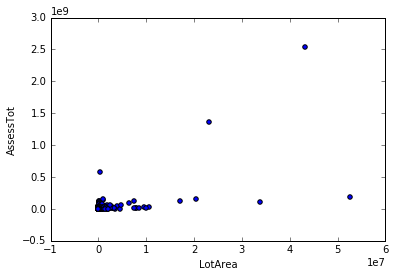

In [85]:
plt.scatter(data_4.LotArea,data_4.AssessTot)
plt.xlabel('LotArea')
plt.ylabel('AssessTot')
plt.show()

#### (c).  Build a model : AssessTot=$w_1$*LotArea + $w_2$. Get $w_1$, $w_2$ and $R^2$.  Plot your results together with observations. 

In [127]:
lm = smf.ols(formula='AssessTot ~ LotArea', data = data_4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              AssessTot   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                 1.724e+05
Date:                Sun, 25 Sep 2016   Prob (F-statistic):               0.00
Time:                        10:14:31   Log-Likelihood:            -4.6221e+06
No. Observations:              275982   AIC:                         9.244e+06
Df Residuals:                  275980   BIC:                         9.244e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   7.694e+04   8648.667      8.897      0.0

In [128]:
#print parameters w1, w2 and rsquared
print "W1 = ", lm.params[1]
print "W2 = ", lm.params[0]
print "R^2 =", lm.rsquared

W1 =  21.160373533
W2 =  76944.2978378
R^2 = 0.384460103284


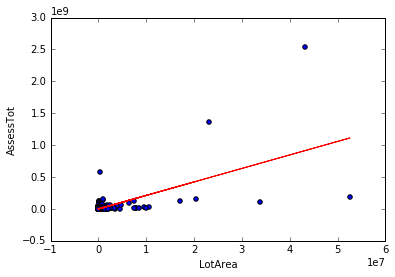

In [88]:
#plot
data_4.plot(kind='scatter',x='LotArea',y='AssessTot')
plt.plot(data_4.LotArea, lm.predict(),'r-')
plt.show()

#### (d) Repeat (c) without intercept, i.e. with $w_2=0$.

In [89]:
#adjust the formula in OLS to include a -1 to remove the intercept
lm2 = smf.ols(formula='AssessTot ~ LotArea - 1', data = data_4).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              AssessTot   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                 1.727e+05
Date:                Sat, 24 Sep 2016   Prob (F-statistic):               0.00
Time:                        11:08:16   Log-Likelihood:            -4.6221e+06
No. Observations:              275982   AIC:                         9.244e+06
Df Residuals:                  275981   BIC:                         9.244e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
LotArea       21.1741      0.051    415.580      0.0

In [130]:
#print parameters w1, w2 and rsquared
print "W1 = ", lm2.params[0]
print "R^2 =", lm2.rsquared

W1 =  21.1740787884
R^2 = 0.38491509123


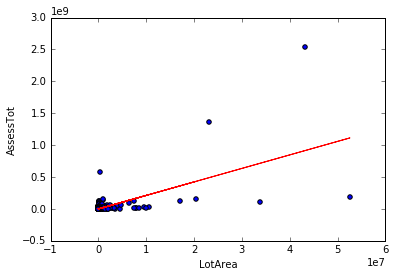

In [91]:
data_4.plot(kind='scatter',x='LotArea',y='AssessTot')
plt.plot(data_4.LotArea, lm2.predict(),'r-')
plt.show()

### Question (5): (20pt)

For the same data as above try the model: log_AssessTot=$w_1$*log_LotArea + $w_2$. Get $w_1$, $w_2$ and $R^2$.  And plot your results together with observations. Explain the result - what does the estimated "$w_1$" means to you?

In [93]:
data_4.loc[:,"log_AssessTot"]=np.log(data_4.AssessTot)
data_4.loc[:,"log_LotArea"]=np.log(data_4.LotArea)
data_4.head()

,ZipCode,LotArea,AssessTot,log_AssessTot,log_LotArea
0,11201,151930,1164645,13.967927,11.931175
1,11201,9620,5864850,15.584487,9.171600
2,11201,19682,12019950,16.302078,9.887460
5,11201,6384,21150,9.959395,8.761550
10,11201,66889,11700,9.367344,11.110790


In [95]:
lm3 = smf.ols(formula='log_AssessTot ~ log_LotArea', data = data_4).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:          log_AssessTot   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 2.659e+05
Date:                Sat, 24 Sep 2016   Prob (F-statistic):               0.00
Time:                        11:12:46   Log-Likelihood:            -3.4460e+05
No. Observations:              275982   AIC:                         6.892e+05
Df Residuals:                  275980   BIC:                         6.892e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       0.2074      0.020     10.275      

In [131]:
print "W1 = ", lm3.params[1]
print "W2 = ", lm3.params[0]
print "R^2 =", lm3.rsquared

W1 =  1.32514911392
W2 =  0.207381598948
R^2 = 0.490743686492


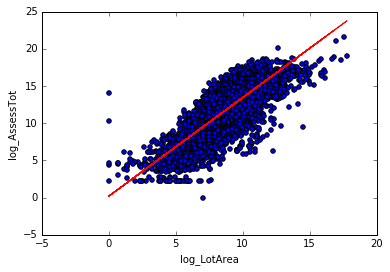

In [132]:
#Plot
data_4.plot(kind='scatter',x='log_LotArea',y='log_AssessTot')
plt.plot(data_4.log_LotArea,lm3.predict(),'r-')
plt.show()

W1 is the degree of the best fitting polynomial for the equation AssessTot = LotArea^w1.  Because the value of w1 does not equal 1, this is not a linear relation.  Because it is close to 1 in value, we can safely use the linear regression as a baseline prediction. 

### *Additional extra-credit question (Using the housing price data set from question (4)) (40 pt to be added to the cumulative homework score up to the maximum of 100%(for whole semester))

#### (a) How many different zip codes are in the data? report the number of observations for each zipcode.

#### (b) For each zip code having over 1000 observations, report the average assessed total value of houses.

#### (c) For each zip code estimate the log scale model 'log_AssessTot ~ log_LotArea' and report the slope coefficient (scaling exponent).

#### (d) Visualize the spatial distribution of the values from (b) and (c). Report the top 5 zip code with highest scaling exponents.

In [76]:
#A - Unique ZipCodes (using cleaned data - there may be more but they have been eliminated during cleaning)
UniqueZips = data_4.ZipCode.unique()
print UniqueZips.shape
#There are 41 unique zipcodes

(41,)


In [135]:
#A - Number of Obeservations per zipcode
ObsPerZip = data_4.groupby('ZipCode').count().reset_index()
ObsPerZip['Count'] = ObsPerZip['LotArea']
ObsPerZip = ObsPerZip[['ZipCode','Count']]
ObsPerZip

,ZipCode,Count
0,11201,3361
1,11203,11011
2,11204,9946
3,11205,3196
4,11206,4665
5,11207,11413
6,11208,11284
7,11209,8451
8,11210,8540
9,11211,5462


In [136]:
#B If the number of observations per zipcode is greater than 1000, then compute the mean assessed value
ObsPerZip2 = ObsPerZip[ObsPerZip.Count>1000]

In [139]:
MeanAssessbyZip = data_4.groupby('ZipCode').mean().reset_index()

In [142]:
MeanAssessbyZip = MeanAssessbyZip[['ZipCode', 'AssessTot']]
MeanAssessbyZip = pd.merge(ObsPerZip2, MeanAssessbyZip, how = 'left', on = 'ZipCode')

In [143]:
MeanAssessbyZip

,ZipCode,Count,AssessTot
0,11201,3361,1672253.175543
1,11203,11011,121020.278994
2,11204,9946,104542.541323
3,11205,3196,350940.932728
4,11206,4665,311533.268167
5,11207,11413,100342.272934
6,11208,11284,86440.452056
7,11209,8451,173187.026742
8,11210,8540,119467.800585
9,11211,5462,249301.736726


In [144]:
#Part C - for all zipcodes (not just ones with 1000 or more observations), 
#find the slope coefficient for each Zipcode 
#Use the log of the Assess Total and the Lot Area

In [159]:
Scaling = []
for ZipCode in UniqueZips:
    print"\nZipCode", int(ZipCode)
    #run OLS using SMF
    lm = smf.ols(formula = 'log_AssessTot ~ log_LotArea', data = data_4[data_4['ZipCode'] == ZipCode]).fit()
    print "Slope Coefficient", lm.params[1]
    Scaling.append([ZipCode, lm.params[1]])


ZipCode 11201
Slope Coefficient 1.40566238998

ZipCode 11217
Slope Coefficient 1.41572985696

ZipCode 11241
Slope Coefficient 1.78846614285

ZipCode 11231
Slope Coefficient 1.13532306805

ZipCode 11215
Slope Coefficient 1.54101337176

ZipCode 11232
Slope Coefficient 1.37867527557

ZipCode 11220
Slope Coefficient 1.50079296563

ZipCode 11218
Slope Coefficient 1.2825529719

ZipCode 11238
Slope Coefficient 1.62155780044

ZipCode 11226
Slope Coefficient 1.38624748791

ZipCode 11225
Slope Coefficient 1.57818700108

ZipCode 11216
Slope Coefficient 1.64911328535

ZipCode 11213
Slope Coefficient 1.58430381989

ZipCode 11203
Slope Coefficient 1.39184882177

ZipCode 11233
Slope Coefficient 1.52139364215

ZipCode 11212
Slope Coefficient 1.48499248413

ZipCode 11221
Slope Coefficient 1.59281394386

ZipCode 11207
Slope Coefficient 1.34199102675

ZipCode 11206
Slope Coefficient 1.48736635053

ZipCode 11205
Slope Coefficient 1.50368285463

ZipCode 11251
Slope Coefficient 1.16982951091

ZipCode 11249

In [165]:
dfScaling = pd.DataFrame(Scaling)
dfScaling.rename(columns = {0:'Zipcode', 1:'SlopeCoefficient'}, inplace=True)
dfScaling

,Zipcode,SlopeCoefficient
0,11201,1.405662
1,11217,1.415730
2,11241,1.788466
3,11231,1.135323
4,11215,1.541013
5,11232,1.378675
6,11220,1.500793
7,11218,1.282553
8,11238,1.621558
9,11226,1.386247


In [166]:
#D - Find the zipcodes with the largest scaling

In [167]:
dfScaling.sort_values(by="SlopeCoefficient",ascending=False)[0:5]

,Zipcode,SlopeCoefficient
2,11241,1.788466
11,11216,1.649113
8,11238,1.621558
16,11221,1.592814
12,11213,1.584304
